In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [55]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
df = pd.read_csv('/content/drive/MyDrive/Combined.csv')
df.head()


,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [57]:
null_columns = [df.isna().any() == True]
print(null_columns)

[Unnamed: 0     False
Seq            False
Dur            False
RunTime        False
Mean           False
Sum            False
Min            False
Max            False
Proto          False
sTos            True
dTos            True
sDSb            True
dDSb            True
sTtl            True
dTtl            True
sHops           True
dHops           True
Cause          False
TotPkts        False
SrcPkts        False
DstPkts        False
TotBytes       False
SrcBytes       False
DstBytes       False
Offset         False
sMeanPktSz     False
dMeanPktSz     False
Load           False
SrcLoad        False
DstLoad        False
Loss           False
SrcLoss        False
DstLoss        False
pLoss          False
SrcGap          True
DstGap          True
Rate           False
SrcRate        False
DstRate        False
State          False
SrcWin          True
DstWin          True
sVid            True
dVid            True
SrcTCPBase      True
DstTCPBase      True
TcpRtt         False
SynAck      

In [58]:
df_encoded = pd.get_dummies(df[['Proto','State']], columns=['Proto', 'State'])
# df.head()
df_encoded.head()

,Proto_arp,Proto_icmp,Proto_ipv6-icmp,Proto_llc,Proto_lldp,Proto_sctp,Proto_tcp,Proto_udp,State_ACC,State_CON,State_ECO,State_FIN,State_INT,State_NRS,State_REQ,State_RSP,State_RST,State_TST,State_URP
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [59]:
select_features_df = df[[ 'AckDat', 'sHops', 'Seq', 'Proto','State','TcpRtt', 'dMeanPktSz', 'Offset', 'sTtl',  'Mean', 'SrcTCPBase', 'sMeanPktSz', 'DstLoss', 'Loss', 'dTtl', 'SrcBytes', 'TotBytes','Label', 'Attack Type']]
select_features_df.head()

,AckDat,sHops,Seq,Proto,State,TcpRtt,dMeanPktSz,Offset,sTtl,Mean,SrcTCPBase,sMeanPktSz,DstLoss,Loss,dTtl,SrcBytes,TotBytes,Label,Attack Type
0,0.0,6.0,1,icmp,ECO,0.0,0.000000,128,58.0,0.000000,NaN,98.000000,0,0,NaN,98,98,Benign,Benign
1,0.0,6.0,2,icmp,ECO,0.0,0.000000,232,58.0,0.000000,NaN,98.000000,0,0,NaN,98,98,Benign,Benign
2,0.0,11.0,3,udp,CON,0.0,271.166656,336,117.0,4.998020,NaN,1245.979614,0,0,64.0,244212,249093,Benign,Benign
3,0.0,11.0,4,udp,CON,0.0,260.333344,440,117.0,4.998037,NaN,1326.656494,0,0,64.0,216245,221712,Benign,Benign
4,0.0,11.0,5,udp,CON,0.0,236.473679,544,117.0,4.999453,NaN,1351.583374,0,0,64.0,275723,280216,Benign,Benign


In [60]:
null_columns = [select_features_df.isna().any() == True]
null_columns

[AckDat         False
 sHops           True
 Seq            False
 Proto          False
 State          False
 TcpRtt         False
 dMeanPktSz     False
 Offset         False
 sTtl            True
 Mean           False
 SrcTCPBase      True
 sMeanPktSz     False
 DstLoss        False
 Loss           False
 dTtl            True
 SrcBytes       False
 TotBytes       False
 Label          False
 Attack Type    False
 dtype: bool]

In [61]:
st = "tcp 1,460,107.76 AckDat 283,300.90 sHops 159,802.03 Seq 52,291.33 RST 50,894.45 TcpRtt 47,017.48 REQ 44,521.06  dMeanPktSz 41,572.58 Offset 38,844.09 CON 37,448.56 FIN 36,644.63 sTtl 24,115.22 e 20,410.25 INT 17,248.98 Mean 15,394.60 Status 13,879.31 icmp 8,376.06 SrcTCPBase 6,592.89 ed 4,434.32 sMeanPktSz 4,183.54 DstLoss 2,625.58 Loss 1,954.14 dTtl 1,839.87 SrcBytes 1,606.26 TotBytes 1,587.40"
ar = st.split()
print(ar)

['tcp', '1,460,107.76', 'AckDat', '283,300.90', 'sHops', '159,802.03', 'Seq', '52,291.33', 'RST', '50,894.45', 'TcpRtt', '47,017.48', 'REQ', '44,521.06', 'dMeanPktSz', '41,572.58', 'Offset', '38,844.09', 'CON', '37,448.56', 'FIN', '36,644.63', 'sTtl', '24,115.22', 'e', '20,410.25', 'INT', '17,248.98', 'Mean', '15,394.60', 'Status', '13,879.31', 'icmp', '8,376.06', 'SrcTCPBase', '6,592.89', 'ed', '4,434.32', 'sMeanPktSz', '4,183.54', 'DstLoss', '2,625.58', 'Loss', '1,954.14', 'dTtl', '1,839.87', 'SrcBytes', '1,606.26', 'TotBytes', '1,587.40']


In [62]:
even_indices_elements = ar[::2]
print(even_indices_elements)


['tcp', 'AckDat', 'sHops', 'Seq', 'RST', 'TcpRtt', 'REQ', 'dMeanPktSz', 'Offset', 'CON', 'FIN', 'sTtl', 'e', 'INT', 'Mean', 'Status', 'icmp', 'SrcTCPBase', 'ed', 'sMeanPktSz', 'DstLoss', 'Loss', 'dTtl', 'SrcBytes', 'TotBytes']


In [63]:
print(select_features_df.isnull().sum())

select_features_df['sHops'].fillna(df['sHops'].mean(), inplace = True)
select_features_df['sTtl'].fillna(df['sTtl'].mean(), inplace = True)
select_features_df['SrcTCPBase'].fillna(df['SrcTCPBase'].mean(), inplace = True)
select_features_df['dTtl'].fillna(df['dTtl'].mean(), inplace = True)

print(select_features_df.isnull().sum())


AckDat              0
sHops             214
Seq                 0
Proto               0
State               0
TcpRtt              0
dMeanPktSz          0
Offset              0
sTtl              214
Mean                0
SrcTCPBase     937219
sMeanPktSz          0
DstLoss             0
Loss                0
dTtl           943067
SrcBytes            0
TotBytes            0
Label               0
Attack Type         0
dtype: int64
AckDat         0
sHops          0
Seq            0
Proto          0
State          0
TcpRtt         0
dMeanPktSz     0
Offset         0
sTtl           0
Mean           0
SrcTCPBase     0
sMeanPktSz     0
DstLoss        0
Loss           0
dTtl           0
SrcBytes       0
TotBytes       0
Label          0
Attack Type    0
dtype: int64


In [64]:
select_features_df.head()

,AckDat,sHops,Seq,Proto,State,TcpRtt,dMeanPktSz,Offset,sTtl,Mean,SrcTCPBase,sMeanPktSz,DstLoss,Loss,dTtl,SrcBytes,TotBytes,Label,Attack Type
0,0.0,6.0,1,icmp,ECO,0.0,0.000000,128,58.0,0.000000,2.044248e+09,98.000000,0,0,65.323638,98,98,Benign,Benign
1,0.0,6.0,2,icmp,ECO,0.0,0.000000,232,58.0,0.000000,2.044248e+09,98.000000,0,0,65.323638,98,98,Benign,Benign
2,0.0,11.0,3,udp,CON,0.0,271.166656,336,117.0,4.998020,2.044248e+09,1245.979614,0,0,64.000000,244212,249093,Benign,Benign
3,0.0,11.0,4,udp,CON,0.0,260.333344,440,117.0,4.998037,2.044248e+09,1326.656494,0,0,64.000000,216245,221712,Benign,Benign
4,0.0,11.0,5,udp,CON,0.0,236.473679,544,117.0,4.999453,2.044248e+09,1351.583374,0,0,64.000000,275723,280216,Benign,Benign


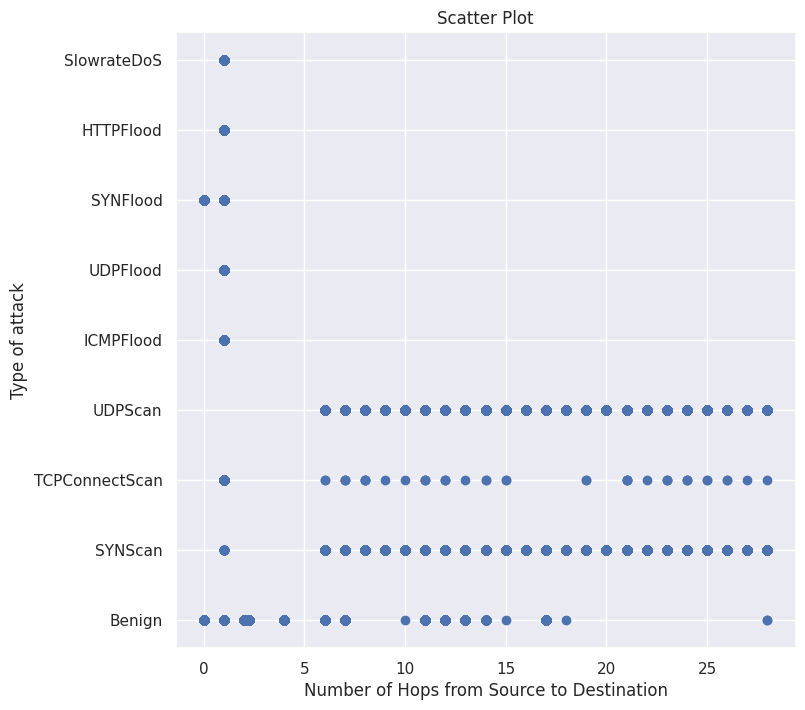

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(select_features_df['sHops'], select_features_df['Attack Type'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.ylabel('Type of attack')
plt.xlabel('Number of Hops from Source to Destination')

plt.show()


In [66]:
# import pandas as pd
# import matplotlib.pyplot as plt

# benign = select_features_df.loc[df['Label'] == 'Benign']
# plt.bar(benign.head(100)['Proto'], 100)


# plt.title("Bar Chart")

# # Setting the X and Y labels
# plt.xlabel('Day')
# plt.ylabel('Tip')

# # Adding the legends
# plt.show()


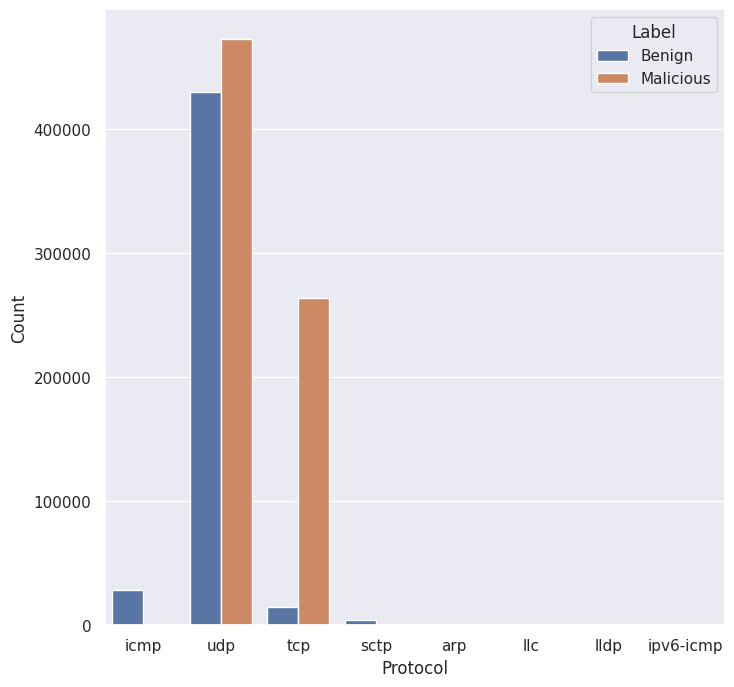

In [71]:
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))
chart = sns.countplot(x="Proto",hue="Label", data=select_features_df)
chart.set(xlabel='Protocol', ylabel='Count')
plt.show()

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

benign = select_features_df.loc[df['Proto'] == 'udp']
# plt.bar(benign)
benign.head()


# plt.title("Bar Chart")

# # Setting the X and Y labels
# plt.xlabel('Day')
# plt.ylabel('Tip')

# # Adding the legends
# plt.show()


# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]

# plot = benign.plot(kind='pie', title="My plot", subplots=True)



,AckDat,sHops,Seq,Proto,State,TcpRtt,dMeanPktSz,Offset,sTtl,Mean,SrcTCPBase,sMeanPktSz,DstLoss,Loss,dTtl,SrcBytes,TotBytes,Label,Attack Type
2,0.0,11.0,3,udp,CON,0.0,271.166656,336,117.0,4.998020,2.044248e+09,1245.979614,0,0,64.0,244212,249093,Benign,Benign
3,0.0,11.0,4,udp,CON,0.0,260.333344,440,117.0,4.998037,2.044248e+09,1326.656494,0,0,64.0,216245,221712,Benign,Benign
4,0.0,11.0,5,udp,CON,0.0,236.473679,544,117.0,4.999453,2.044248e+09,1351.583374,0,0,64.0,275723,280216,Benign,Benign
5,0.0,11.0,6,udp,CON,0.0,298.375000,648,117.0,4.997818,2.044248e+09,1337.347046,0,0,64.0,292879,297653,Benign,Benign
6,0.0,0.0,7,udp,CON,0.0,303.666656,752,64.0,0.089686,2.044248e+09,111.285713,0,0,53.0,779,2601,Benign,Benign


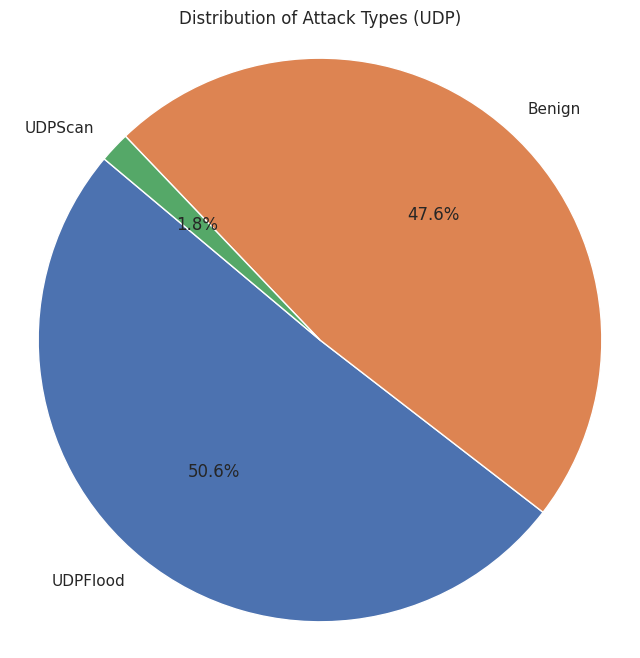

In [69]:
import matplotlib.pyplot as plt

# Filter DataFrame for rows where the protocol is 'udp'
udp_df = select_features_df.loc[select_features_df['Proto'] == 'udp']

# Count occurrences of each attack type
attack_counts = udp_df['Attack Type'].value_counts()

# Calculate percentages
attack_percentages = (attack_counts / attack_counts.sum()) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(attack_percentages, labels=attack_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attack Types (UDP)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


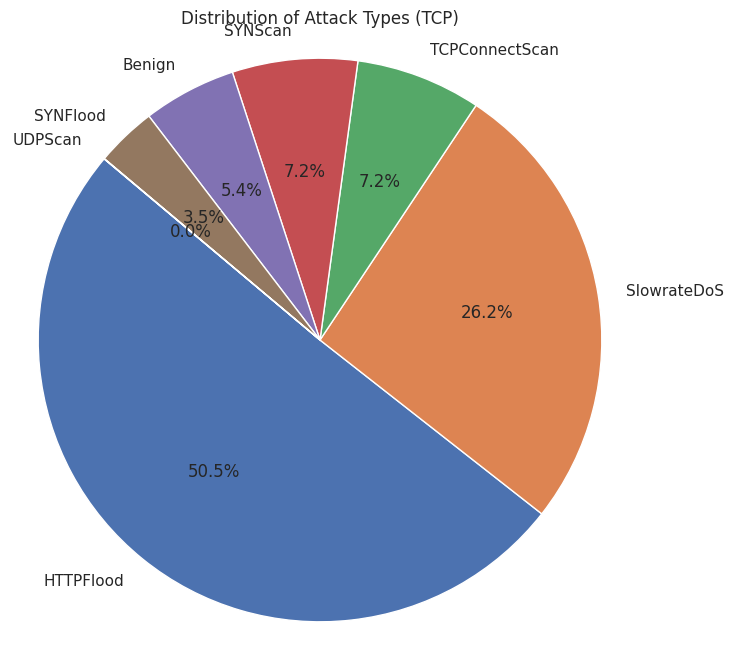

In [70]:
import matplotlib.pyplot as plt

# Filter DataFrame for rows where the protocol is 'udp'
udp_df = select_features_df.loc[select_features_df['Proto'] == 'tcp']

# Count occurrences of each attack type
attack_counts = udp_df['Attack Type'].value_counts()

# Calculate percentages
attack_percentages = (attack_counts / attack_counts.sum()) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(attack_percentages, labels=attack_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attack Types (TCP)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
